In [1]:
import os
import datetime
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['axes.grid'] = False

In [10]:
def is_gzip_file(filepath):
    with open(filepath, 'rb') as f:
        return f.read(2) == b'\x1f\x8b'
def display_all(df):
    plot_cols = df.columns
    plot_features = df[plot_cols]
    plot_features.index = df.index
    _ = plot_features.plot(subplots=True)

    plot_features = df[plot_cols][:960]
    plot_features.index = df.index[:960]
    _ = plot_features.plot(subplots=True)

In [12]:
csv_path = tf.keras.utils.get_file(
    #origin='https://itsci.mju.ac.th/downloads/watcharin/datasets/pv/sis_selected_timeseries.csv.tar.gz')
    origin='https://itsci.mju.ac.th/downloads/watcharin/datasets/pv/utci_selected_timeseries.csv.tar.gz')
csv_path

285418/285418 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


'C:\\Users\\ASUS\\.keras\\datasets\\utci_selected_timeseries.csv.tar.gz'

In [13]:
if is_gzip_file(csv_path):
  # Read the data directly into a pandas DataFrame
  df = pd.read_csv(csv_path, compression='gzip')
else:
  # Read the data without compression
  df = pd.read_csv(csv_path)
df = df.rename(columns={df.columns[0]: 'datetime'})
row_count = df.shape[0]
print(f"Total rows: {row_count}")
df.head(5)

Total rows: 40153


,datetime,utci_mean
0,2021-01-01T00:00:00,282.848994
1,2021-01-01T01:00:00,289.636964
2,2021-01-01T02:00:00,295.965613
3,2021-01-01T03:00:00,297.920469
4,2021-01-01T04:00:00,299.311556


In [14]:
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.sort_values('datetime').reset_index(drop=True)

In [15]:
# Convert 'timestamp' column to datetime
df = df.set_index('datetime')

print(df.index.year.unique())
print(df.index.year.value_counts())

Index([2021.0, 2022.0, 2023.0, 2024.0, 2025.0, nan], dtype='float64', name='datetime')
datetime
2024.0    8784
2021.0    8760
2022.0    8760
2023.0    8760
2025.0    5088
Name: count, dtype: int64


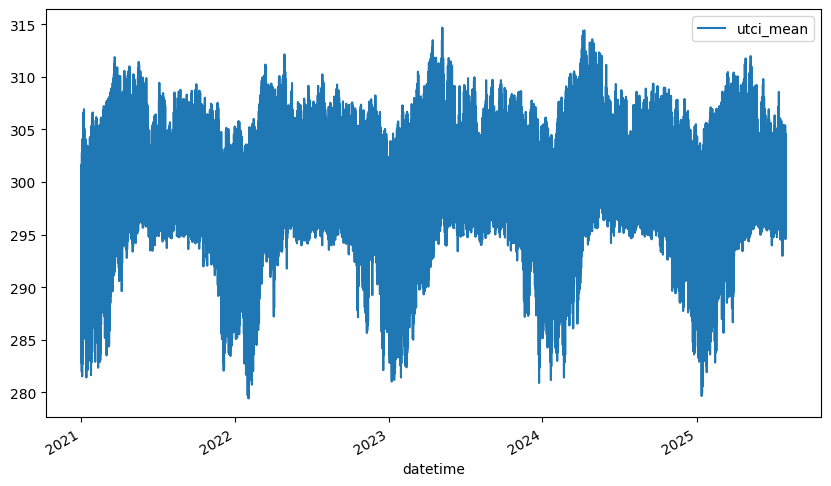

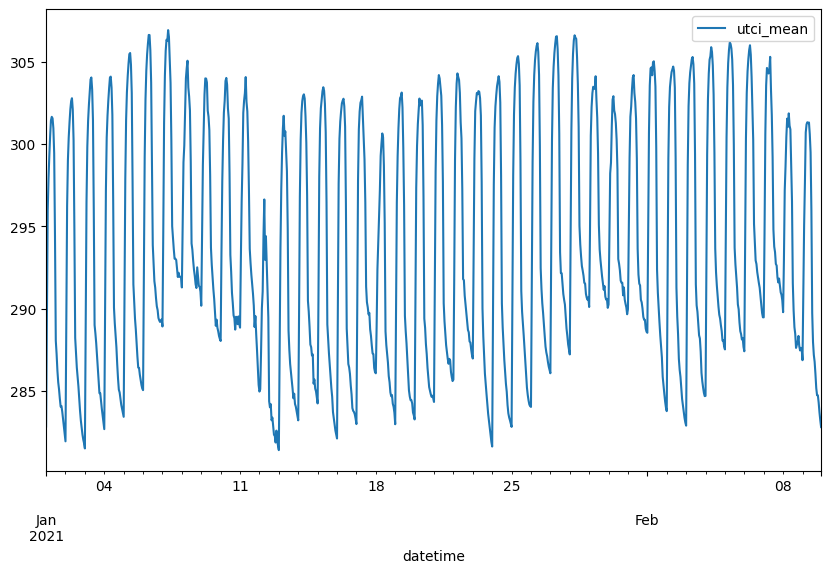

In [16]:
display_all(df)